Importing required libraries for this project

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

Loading the train DataSet

In [51]:
datr =  pd.read_csv("bigdatamartTrain.csv")
datr

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


There are 8523 rows and 12 columns in this given dataset and we can see categorical data in some columns and also NAN in some rows.

We will see how to handle this kinda data.

Loading the test DataSet

In [52]:
dte =  pd.read_csv("bigdatamartTest.csv")
dte

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


There are 5681 rows and 11 columns in this given dataset and we can see categorical data in some columns and also NAN in some rows.

We will see how to handle this kinda data.

In [53]:
datr.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [54]:
datr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


We can see there are null values exist in train dat set in some of the columns and will see how to handle missing values in later part.

In [55]:
dte.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [56]:
dte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


We can see there are null values exist in test dat set in some of the columns and will see how to handle missing values in later part.

We can see there is null values exist in 2 columns in train and test data set.

In [57]:
datr.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [58]:
dte.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

We will see how the categorical data has been distributed via Visualization in train dataset.

In [59]:
datr['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

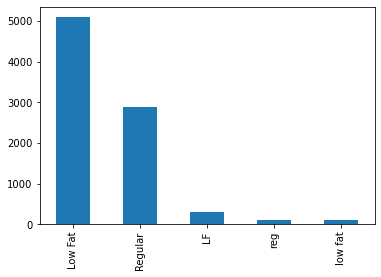

In [60]:
datr['Item_Fat_Content'].value_counts(normalize = True)
datr['Item_Fat_Content'].value_counts().plot.bar()
plt.show()

In [61]:
datr['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCL31     9
NCY18     9
NCQ06     9
         ..
FDT35     1
FDO33     1
FDN52     1
FDK57     1
FDQ60     1
Name: Item_Identifier, Length: 1559, dtype: int64

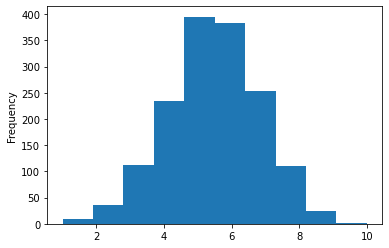

In [62]:
datr['Item_Identifier'].value_counts(normalize = True)
datr['Item_Identifier'].value_counts().plot.hist()
plt.show()

In [63]:
datr['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

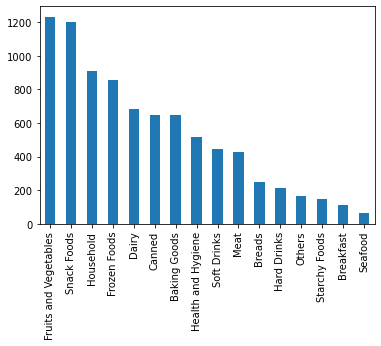

In [64]:
datr['Item_Type'].value_counts(normalize = True)
datr['Item_Type'].value_counts().plot.bar()
plt.show()

In [65]:
datr['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

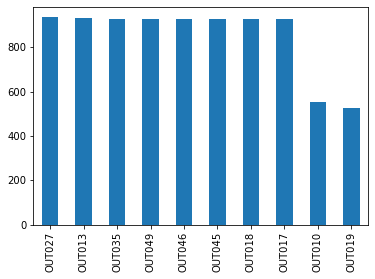

In [66]:
datr['Outlet_Identifier'].value_counts(normalize = True)
datr['Outlet_Identifier'].value_counts().plot.bar()
plt.show()

In [67]:
datr['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

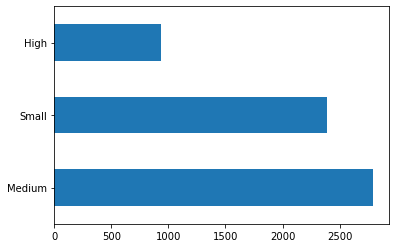

In [68]:
datr['Outlet_Size'].value_counts(normalize = True)
datr['Outlet_Size'].value_counts().plot.barh()
plt.show()

In [69]:
datr['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

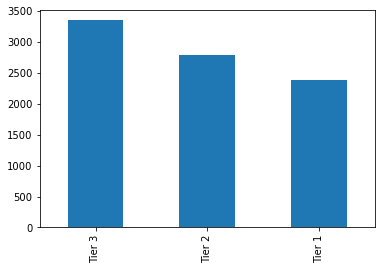

In [70]:
datr['Outlet_Location_Type'].value_counts(normalize = True)
datr['Outlet_Location_Type'].value_counts().plot.bar()
plt.show()

In [71]:
datr['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

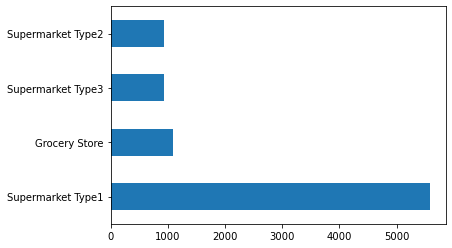

In [72]:
datr['Outlet_Type'].value_counts(normalize = True)
datr['Outlet_Type'].value_counts().plot.barh()
plt.show()

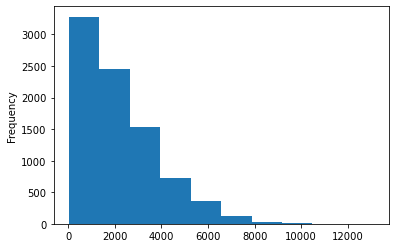

In [73]:
datr['Item_Outlet_Sales'].plot.hist()
plt.show()

Replacing null values with mean and mode values for train and test dataset

In [74]:
datr['Item_Weight'] = datr['Item_Weight'].fillna(datr['Item_Weight'].mean())
datr['Outlet_Size'] = datr['Outlet_Size'].fillna(datr['Outlet_Size'].mode()[0])

dte['Item_Weight'] = dte['Item_Weight'].fillna(dte['Item_Weight'].mean())
dte['Outlet_Size'] = dte['Outlet_Size'].fillna(dte['Outlet_Size'].mode()[0])

In [75]:
datr.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [76]:
dte.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [77]:
datr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [78]:
dte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


Separting Categorical data and Numerical data for train DataSet

In [79]:
num = datr.select_dtypes(exclude = np.object)
cat = datr.select_dtypes(include = np.object)

Separting Categorical data and Numerical data for Test DataSet

In [80]:
num1 = dte.select_dtypes(exclude = np.object)
cat1 = dte.select_dtypes(include = np.object)

In [81]:
num.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [82]:
cat.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [83]:
num1.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,20.750000,0.007565,107.8622,1999
1,8.300000,0.038428,87.3198,2007
2,14.600000,0.099575,241.7538,1998
3,7.315000,0.015388,155.0340,2007
4,12.695633,0.118599,234.2300,1985


In [84]:
cat1.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,Low Fat,Snack Foods,OUT049,Medium,Tier 1,Supermarket Type1
1,FDW14,reg,Dairy,OUT017,Medium,Tier 2,Supermarket Type1
2,NCN55,Low Fat,Others,OUT010,Medium,Tier 3,Grocery Store
3,FDQ58,Low Fat,Snack Foods,OUT017,Medium,Tier 2,Supermarket Type1
4,FDY38,Regular,Dairy,OUT027,Medium,Tier 3,Supermarket Type3


Applying label Encoder technique to convert categorical data to numerical data for train dataset.

In [85]:
le = LabelEncoder()
cat = cat.apply(le.fit_transform)

Applying label Encoder technique to convert categorical data to numerical data for test dataset.

In [86]:
cat1= cat1.apply(le.fit_transform)

Dropping the column as we are not able to catrgorize this under any category and may have data leakage.

In [87]:
cat = cat.drop(columns = ['Item_Identifier'])
cat

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1,4,9,1,0,1
1,2,14,3,1,2,2
2,1,10,9,1,0,1
3,2,6,0,1,2,0
4,1,9,1,0,2,1
...,...,...,...,...,...,...
8518,1,13,1,0,2,1
8519,2,0,7,1,1,1
8520,1,8,6,2,1,1
8521,2,13,3,1,2,2


Dropping the column in test dataset as we are not able to catrgorize this under any category and may have data leakage.

In [88]:
cat1 = cat1.drop(columns = ['Item_Identifier'])
cat1

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1,13,9,1,0,1
1,4,4,2,1,1,1
2,1,11,0,1,2,0
3,1,13,2,1,1,1
4,2,4,5,1,2,3
...,...,...,...,...,...,...
5676,2,13,8,2,0,1
5677,2,15,3,1,2,2
5678,1,8,7,1,1,1
5679,2,3,2,1,1,1


Checking Null values for categorical data and no null values.

In [89]:
cat.isnull().sum()

Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

In [90]:
cat1.isnull().sum()

Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

Checking Null values for Numerical data and no null values.

In [91]:
num.isnull().sum()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Item_Outlet_Sales            0
dtype: int64

In [92]:
num1.isnull().sum()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
dtype: int64

Visualizing numerical data how this has been distributed can see skewness in item_visibility and item_outlet_sales and we will see this further whether outlier /skewness exist or not.

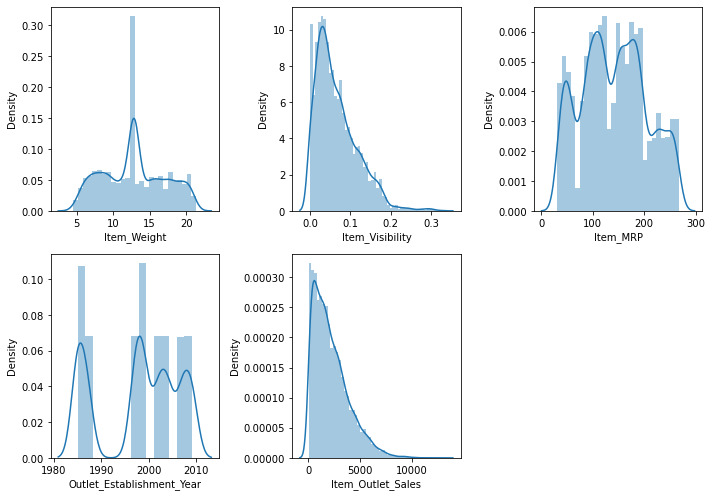

In [93]:
plt.figure(figsize = (10,10))
pltnumber = 1

for column in num:
    if pltnumber<=5:
        ax = plt.subplot(3,3,pltnumber)              ## Train dataset numerical data plot
        sns.distplot(num[column])
        plt.xlabel(column,fontsize=10)
        pltnumber+=1
plt.tight_layout()

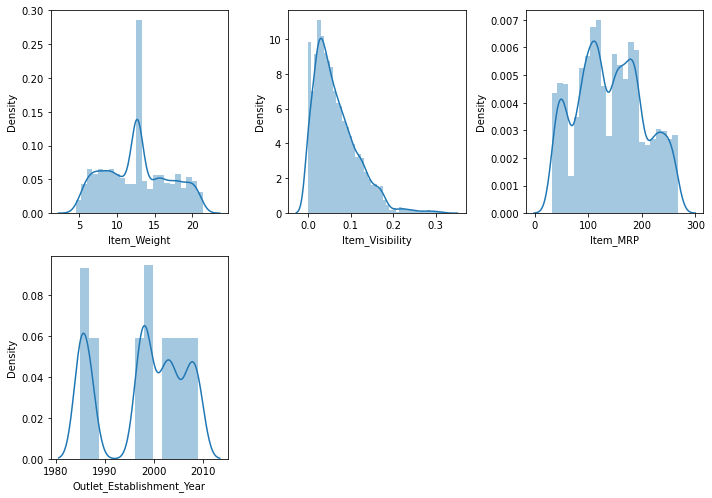

In [94]:
plt.figure(figsize = (10,10))
pltnumber = 1

for column in num1:
    if pltnumber<=5:
        ax = plt.subplot(3,3,pltnumber)              ## Test dataset numerical data plot
        sns.distplot(num1[column])
        plt.xlabel(column,fontsize=10)
        pltnumber+=1
plt.tight_layout()

We can see there are outliers exist in numerical data.

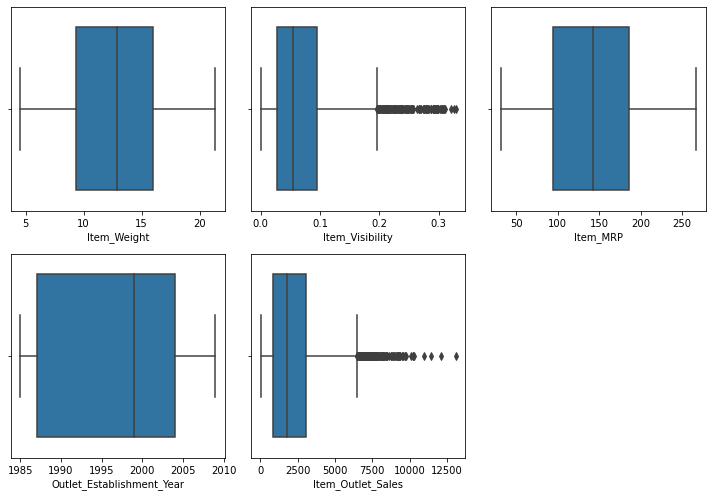

In [95]:
plt.figure(figsize = (10,10))
pltnumber = 1

for column in num:
    if pltnumber<=5:
        ax = plt.subplot(3,3,pltnumber)       #Outliers checking for Train - numerical data
        sns.boxplot(num[column])
        plt.xlabel(column,fontsize=10)
        pltnumber+=1
plt.tight_layout()

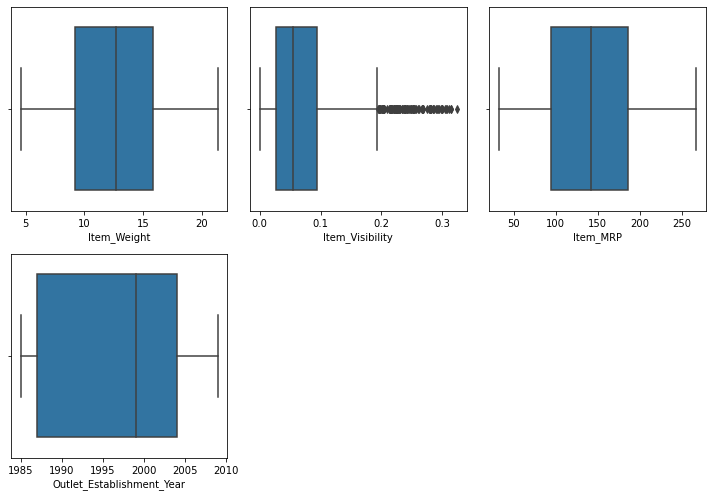

In [96]:
plt.figure(figsize = (10,10))
pltnumber = 1

for column in num1:
    if pltnumber<=5:
        ax = plt.subplot(3,3,pltnumber)       #Outliers checking for Test - numerical data
        sns.boxplot(num1[column])
        plt.xlabel(column,fontsize=10)
        pltnumber+=1
plt.tight_layout()

Applying Z-Score method to remove the outliers and loss of data is 2% for train dataset and 1.4% for test datset,So we can proceed with further for checking skewness.

In [97]:
from scipy.stats import zscore

z = np.abs(zscore(num))
threshold = 3
df_new = num[(z<3).all(axis = 1)]

print("shape before and after")
print("shape before" .ljust(20),":",num.shape)
print("shape after" .ljust(20),":",df_new.shape)
print("% loss" .ljust(20),":",((num.shape[0]-df_new.shape[0])/num.shape[0])*100)

shape before and after
shape before         : (8523, 5)
shape after          : (8338, 5)
% loss               : 2.170597207556025


In [98]:
from scipy.stats import zscore

z = np.abs(zscore(num1))
threshold = 3
df_new1 = num1[(z<3).all(axis = 1)]

print("shape before and after")
print("shape before" .ljust(20),":",num1.shape)
print("shape after" .ljust(20),":",df_new1.shape)
print("% loss" .ljust(20),":",((num1.shape[0]-df_new1.shape[0])/num1.shape[0])*100)

shape before and after
shape before         : (5681, 4)
shape after          : (5600, 4)
% loss               : 1.425805315965499


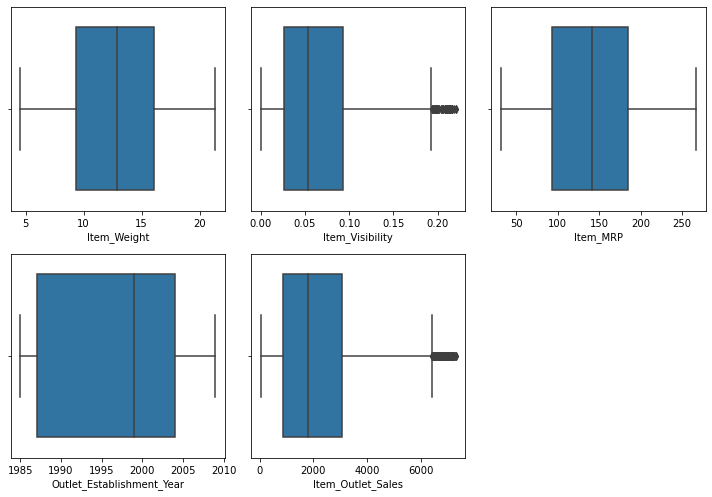

In [99]:
plt.figure(figsize = (10,10))
pltnumber = 1

for column in df_new:
    if pltnumber<=5:
        ax = plt.subplot(3,3,pltnumber)    ##train set after zscore
        sns.boxplot(df_new[column])
        plt.xlabel(column,fontsize=10)
        pltnumber+=1
plt.tight_layout()

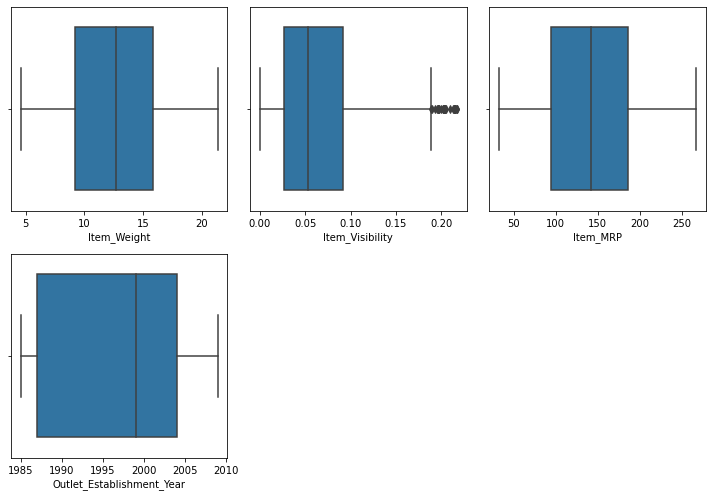

In [100]:
plt.figure(figsize = (10,10))
pltnumber = 1

for column in df_new1:
    if pltnumber<=5:
        ax = plt.subplot(3,3,pltnumber)
        sns.boxplot(df_new1[column])          ##testset after zscore
        plt.xlabel(column,fontsize=10)
        pltnumber+=1
plt.tight_layout()

In [101]:
df_new.skew()  

Item_Weight                  0.089291
Item_Visibility              0.794272
Item_MRP                     0.138990
Outlet_Establishment_Year   -0.423379
Item_Outlet_Sales            0.878267
dtype: float64

In [ ]:
Applying square root function to remove skewness,

In [102]:
df1= np.sqrt(df_new)
df1.skew()

Item_Weight                 -0.207776
Item_Visibility             -0.245035
Item_MRP                    -0.274272
Outlet_Establishment_Year   -0.425418
Item_Outlet_Sales            0.112275
dtype: float64

In [104]:
df2 = np.sqrt(df_new1)
df2.skew()

Item_Weight                 -0.157691
Item_Visibility             -0.283345
Item_MRP                    -0.273354
Outlet_Establishment_Year   -0.413458
dtype: float64

In [103]:
df1.skew()

Item_Weight                 -0.207776
Item_Visibility             -0.245035
Item_MRP                    -0.274272
Outlet_Establishment_Year   -0.425418
Item_Outlet_Sales            0.112275
dtype: float64

In [105]:
df2.skew()

Item_Weight                 -0.157691
Item_Visibility             -0.283345
Item_MRP                    -0.273354
Outlet_Establishment_Year   -0.413458
dtype: float64

After removing skewness,data looks neat.

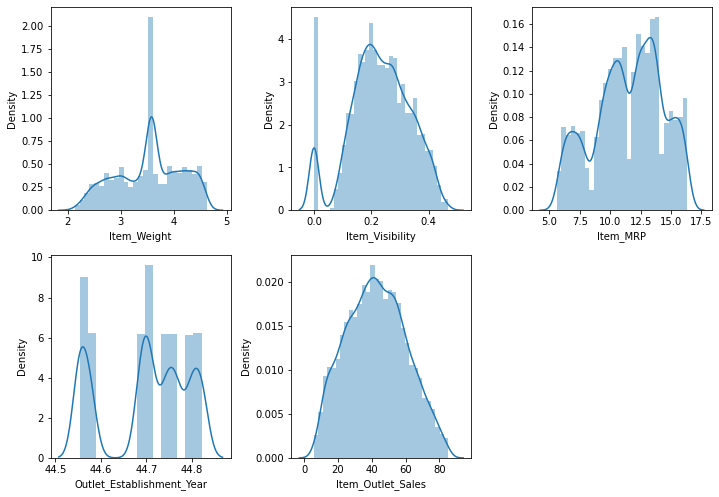

In [107]:
plt.figure(figsize = (10,10))
pltnumber = 1

for column in df1:
    if pltnumber<=5:
        ax = plt.subplot(3,3,pltnumber)        # Train set after skewness removal
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=10)
        pltnumber+=1
plt.tight_layout()

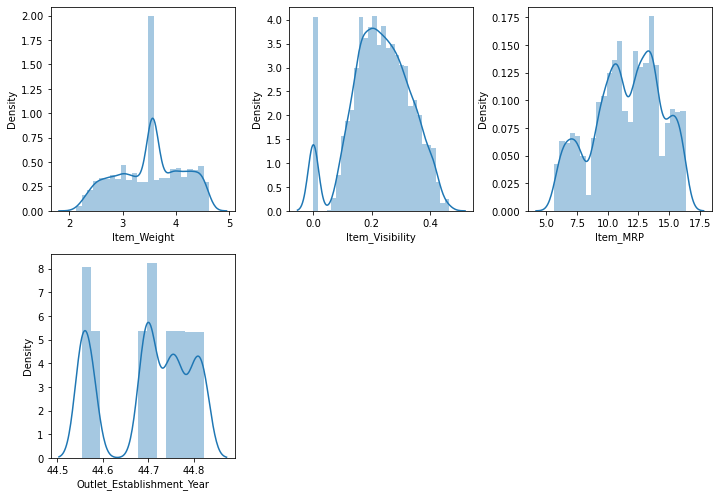

In [106]:
plt.figure(figsize = (10,10))
pltnumber = 1

for column in df2:
    if pltnumber<=5:
        ax = plt.subplot(3,3,pltnumber)     ##test set after skewness removal
        sns.distplot(df2[column])
        plt.xlabel(column,fontsize=10)
        pltnumber+=1
plt.tight_layout()

Concating numerical and categorical data for next steps,

In [108]:
train = pd.concat([df1,cat],axis=1)
train

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,3.049590,0.126678,15.805354,44.710178,61.115775,1,4,9,1,0,1
1,2.433105,0.138846,6.947604,44.821870,21.057607,2,14,3,1,2,2
2,4.183300,0.129461,11.900336,44.710178,45.795961,1,10,9,1,0,1
3,4.381780,0.000000,13.494258,44.698993,27.062520,2,6,0,1,2,0
4,2.988311,0.000000,7.339033,44.575778,31.538947,1,9,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,2.620115,0.238293,14.646563,44.575778,52.710373,1,13,1,0,2,1
8519,2.894823,0.216754,10.399856,44.743715,23.436830,2,0,7,1,1,1
8520,3.255764,0.187580,9.226180,44.766059,34.541477,1,8,6,2,1,1
8521,2.685144,0.381078,10.155452,44.821870,42.960419,2,13,3,1,2,2


In [109]:
test = pd.concat([df2,cat1],axis = 1)
test

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,4.555217,0.086976,10.385673,44.710178,1,13,9,1,0,1
1,2.880972,0.196030,9.344506,44.799554,4,4,2,1,1,1
2,3.820995,0.315555,15.548434,44.698993,1,11,0,1,2,0
3,2.704626,0.124050,12.451265,44.799554,1,13,2,1,1,1
4,3.563093,0.344383,15.304574,44.553339,2,4,5,1,2,3
...,...,...,...,...,...,...,...,...,...,...
5676,3.240370,0.116174,11.887615,44.687806,2,13,8,2,0,1
5677,2.756810,0.378141,13.005568,44.821870,2,15,3,1,2,2
5678,3.162278,0.271162,10.896972,44.743715,1,8,7,1,1,1
5679,3.911521,0.000000,14.649976,44.799554,2,3,2,1,1,1


As we removed the skewed data and outliers,our data is having null values as 2-4% data has been lost.So we will have NA values and we will drop it.

In [110]:
train.isnull().sum()

Item_Weight                  185
Item_Visibility              185
Item_MRP                     185
Outlet_Establishment_Year    185
Item_Outlet_Sales            185
Item_Fat_Content               0
Item_Type                      0
Outlet_Identifier              0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [111]:
train = train.dropna()
train= train.reset_index(drop= True)

In [113]:
test.isnull().sum()

Item_Weight                  81
Item_Visibility              81
Item_MRP                     81
Outlet_Establishment_Year    81
Item_Fat_Content              0
Item_Type                     0
Outlet_Identifier             0
Outlet_Size                   0
Outlet_Location_Type          0
Outlet_Type                   0
dtype: int64

In [114]:
test = test.dropna()
test= test.reset_index(drop= True)

Splitting X and Y values,

In [115]:
x = train.drop(columns = 'Item_Outlet_Sales')
y = train['Item_Outlet_Sales']

Scaling the data as there is a different range of data.So in order to equalize this range,we should scale the data and I used using Standard Scaler() method.

In [116]:
scaler = StandardScaler()
x_sc = scaler.fit_transform(x)

In [117]:
x_train,x_test,y_train,y_test = train_test_split(x_sc,y, test_size = 0.20, random_state = 101)

Model Building - We will try building on different algorthims and see which one fits well for this data using different technique later on this part.

Model :1 - Random Forest Regressor

In [118]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(mse))
print("R2 Score", r2_score(y_test, y_pred))
print("Train score:" , rfr.score(x_train,y_train))
print("Test On TrainDataSet score:" ,  rfr.score(x_test,y_test))

RMSE : 11.028109245727139
R2 Score 0.610039210220438
Train score: 0.9477201176948206
Test On TrainDataSet score: 0.610039210220438


Model 2 : Support Vector Regressor

In [119]:
from sklearn.svm import SVR

svm = SVR()
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(mse))
print("R2 Score", r2_score(y_test, y_pred))
print("Train Data score:" , svm.score(x_train,y_train))
print("Test On TrainDataSet score:" ,  svm.score(x_test,y_test))

RMSE : 10.734488832373295
R2 Score 0.6305279765359137
Train Data score: 0.6602324245682571
Test On TrainDataSet score: 0.6305279765359137


Model 3: Ada Boost Regressor

In [120]:
from sklearn.ensemble import AdaBoostRegressor

abr = AdaBoostRegressor()
abr.fit(x_train,y_train)
y_pred = abr.predict(x_test)


mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(mse))
print("R2 Score", r2_score(y_test, y_pred))
print("Train Data score:" , abr.score(x_train,y_train))
print("Test On TrainDataSet score:" ,  abr.score(x_test,y_test))

RMSE : 10.737621405259691
R2 Score 0.6303123040546503
Train Data score: 0.6407420918384455
Test On TrainDataSet score: 0.6303123040546503


Model 4: Linear Regression

In [121]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()
lin.fit(x_train,y_train)
y_pred = lin.predict(x_test)


mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(mse))
print("R2 Score", r2_score(y_test, y_pred))
print("Train Data score:" , lin.score(x_train,y_train))
print("Test On TrainDataSet score:" ,  lin.score(x_test,y_test))

RMSE : 11.645989219182045
R2 Score 0.5651178426262591
Train Data score: 0.5591731155444778
Test On TrainDataSet score: 0.5651178426262591


Model 5: Gradient Boost Regressor

In [122]:
from sklearn.ensemble import GradientBoostingRegressor 
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
pred = gbr.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(mse))
print("R2 Score", r2_score(y_test, y_pred))
print("Train- Score:-" , gbr.score(x_train,y_train))
print("Test Score:-" , gbr.score(x_test,y_test))

RMSE : 11.645989219182045
R2 Score 0.5651178426262591
Train- Score:- 0.689794082617312
Test Score:- 0.651517756350203


Applying CV Score for all models to check whether the model is overfitting or not.

In [123]:
from sklearn.model_selection import cross_val_score

scr_svm = cross_val_score(svm,x_sc,y,cv=3)
print("CV Score of SVM :", scr_svm.mean())

CV Score of SVM : 0.6447373216021269


In [124]:
scr_rfr = cross_val_score(rfr,x_sc,y,cv=3)
print("CV Score of RFR :", scr_rfr.mean())

CV Score of RFR : 0.6199046668097498


In [125]:
scr_abr = cross_val_score(abr,x_sc,y,cv=3)
print("CV Score of ABR :", scr_abr.mean())

CV Score of ABR : 0.6329380363092353


In [126]:
scr_lin = cross_val_score(lin,x_sc,y,cv=3)
print("CV Score of LIN :", scr_lin.mean())

CV Score of LIN : 0.5589895963324849


In [127]:
scr_gbr = cross_val_score(gbr,x_sc,y,cv=3)
print("CV Score of GBR :", scr_gbr.mean())

CV Score of GBR : 0.6611049842718715


We will try Hyuper parameter tuning to see whether model is increasing the accuracy or not.I am using Support vector to tune the parameter.

In [128]:
param = {'gamma':['scale','auto'], 'C':[1.0,1.2], 'epsilon':[0.1,0.3],
         'max_iter':[-1],
    
}

In [129]:
grid_search = GridSearchCV(svm,param_grid = param, cv=3)

In [130]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'C': [1.0, 1.2], 'epsilon': [0.1, 0.3],
                         'gamma': ['scale', 'auto'], 'max_iter': [-1]})

In [131]:
grid_search.best_params_

{'C': 1.2, 'epsilon': 0.1, 'gamma': 'auto', 'max_iter': -1}

In [133]:
final = SVR(gamma ='auto', C = 1.2, epsilon = 0.1, max_iter =-1 )

final.fit(x_train,y_train)
pred = final.predict(x_test)

print("Train- Score:-" , final.score(x_train,y_train))
print("Test Score:-" , final.score(x_test,y_test))

Train- Score:- 0.6631720967797994
Test Score:- 0.631295561998656


Model increased to some extent compare to cv score and model building.

Saving the model

In [134]:
import joblib
joblib.dump(final,"BigMart-Prediction.pkl")

['BigMart-Prediction.pkl']

Loading the saved model and applying my test dataset here and saving as csv file.

In [135]:
model = joblib.load("BigMart-Prediction.pkl")
prediction = model.predict(test)
prediction = pd.DataFrame(prediction)

In [136]:
prediction.to_csv("final_bigmart_predictions")